In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv("Algeria_forest_fire_cleaned_data.xls")

In [4]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [7]:
data.drop(['day','month','year'],axis=1, inplace=True)

In [8]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [9]:
data.Classes.value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [10]:
## encoding
data.Classes=np.where(data.Classes.str.contains('not fire'),0,1)

In [11]:
data.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [13]:
## Independent and dependent features
X=data.drop('FWI', axis=1)
y=data.FWI

In [14]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [15]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [16]:
## splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.25, random_state=42)

In [17]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

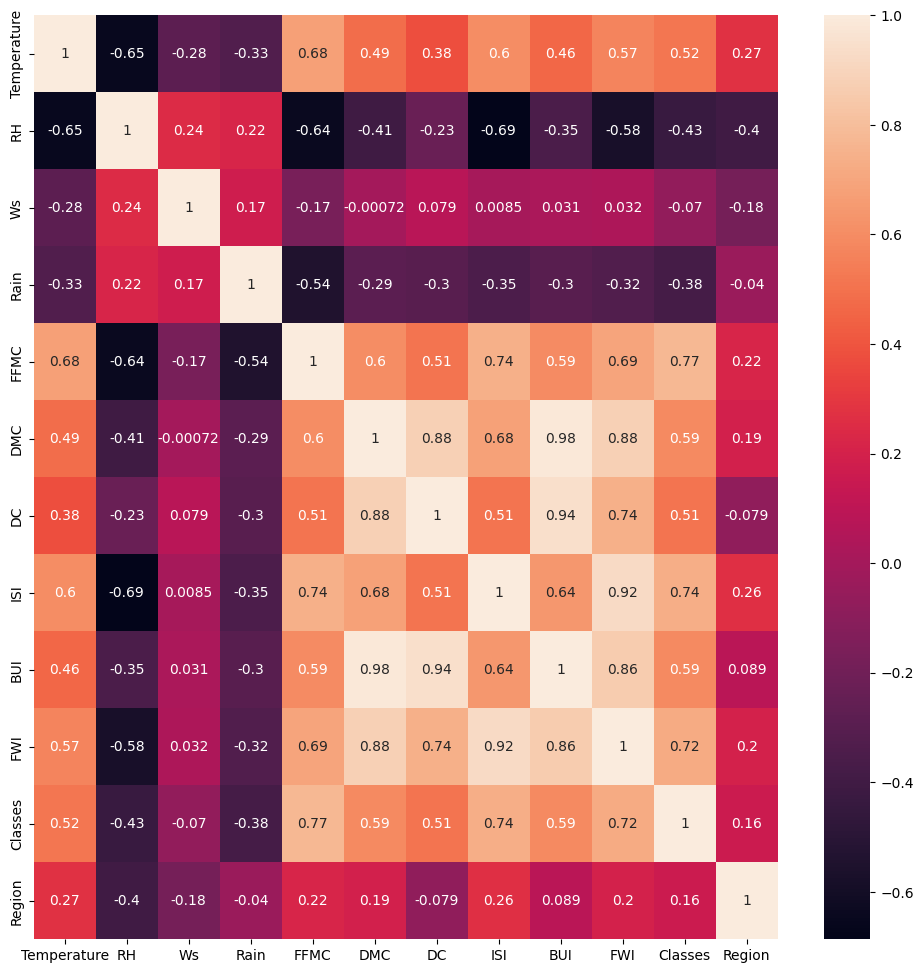

In [18]:
## Feature selection based on correlation
plt.figure(figsize=(12,12))
data.corr()
sns.heatmap(data.corr(), annot=True);

In [21]:
## Check for multicolinierity
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [26]:
## Threshold-Domain expertise
corr_features=correlation(X_train, 0.85)
corr_features

{'BUI', 'DC'}

In [27]:
## Drop features when correalation is more that .85
X_train.drop(corr_features, axis=1, inplaceC=True)

In [28]:
X_test.drop(corr_features, axis=1, inplace=True)

In [29]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [30]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0


### Feature Scalling

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [42]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

In [44]:
X_test_scaled[:5]

array([[-0.30175842,  0.11522353, -0.21905398, -0.38406017,  0.63321824,
        -0.04250757,  0.20377222,  0.90553851, -0.98907071],
       [ 0.23932564, -0.55263261, -0.9784411 , -0.38406017,  0.73798073,
        -0.38335206,  0.36582328,  0.90553851, -0.98907071],
       [-1.11338451, -0.28549015,  0.9200267 ,  0.64524166, -0.97313989,
        -0.91443534, -0.83798463, -1.10431526,  1.01105006],
       [ 0.50986767, -0.28549015, -0.9784411 , -0.29048728,  0.1303583 ,
         0.31419016, -0.62963326, -1.10431526,  1.01105006],
       [-0.57230045,  0.18200914, -0.59874754, -0.38406017,  0.54242408,
         0.10017152, -0.07402961,  0.90553851,  1.01105006]])

## Box Plots understand Effect Of Standard Scaler

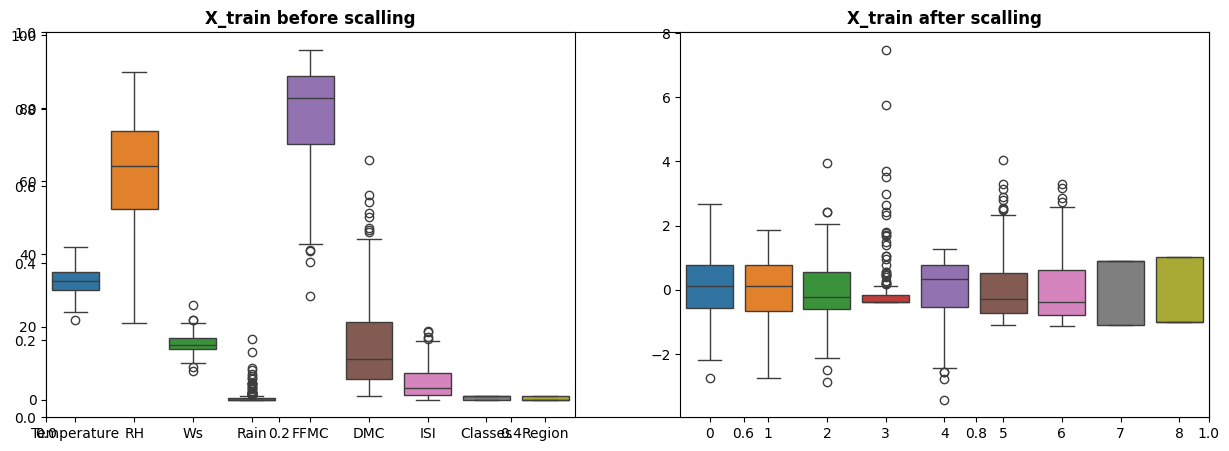

In [46]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scalling', fontweight='bold')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scalling', fontweight='bold');

## Linear Regression Model

In [49]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)

LinearRegression()

Mean Absolute Error: 0.5468236465249976
R2 score: 0.9847657384266951


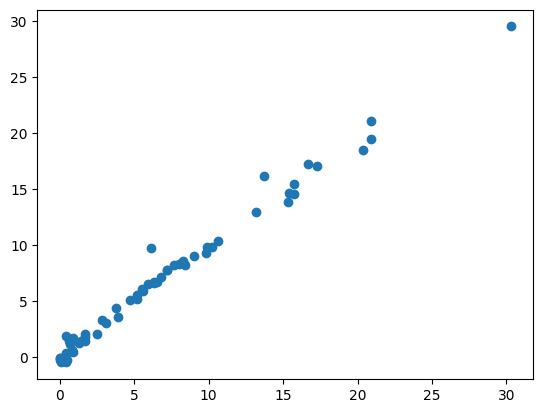

In [53]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean Absolute Error:', mae)
print('R2 score:', score)
plt.scatter(y_test,y_pred)
plt.show()

## Lasso Regression Model.

Mean Absolute Error: 1.1331759949144085
R2 score: 0.9492020263112388


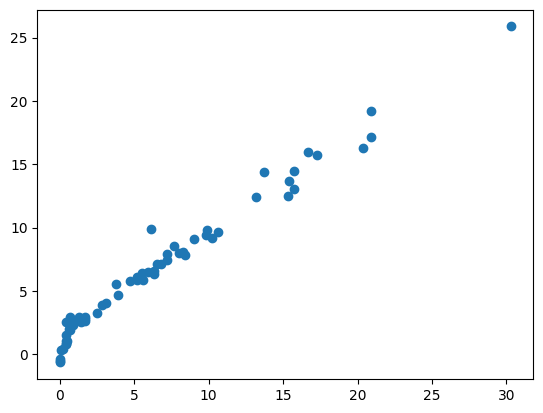

In [54]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean Absolute Error:', mae)
print('R2 score:', score)
plt.scatter(y_test,y_pred)
plt.show()

## Ridge Regression Model.

Mean Absolute Error: 0.5642305340105693
R2 score: 0.9842993364555513


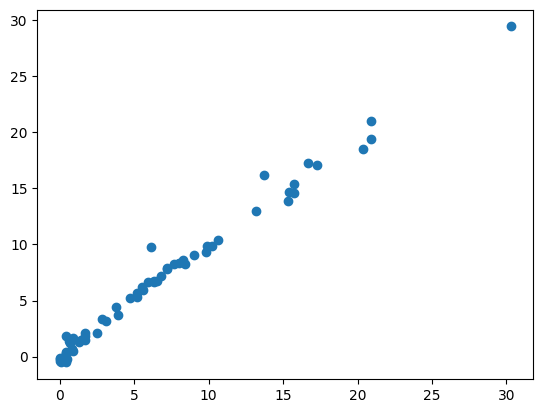

In [55]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean Absolute Error:', mae)
print('R2 score:', score)
plt.scatter(y_test,y_pred)
plt.show()

## ElasticNet Regression model.

Mean Absolute Error: 1.8822353634896
R2 score: 0.8753460589519703


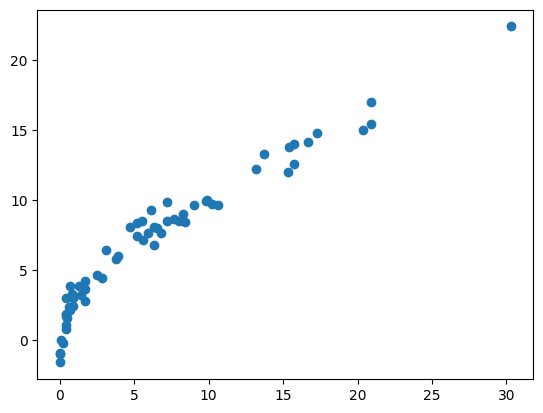

In [56]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean Absolute Error:', mae)
print('R2 score:', score)
plt.scatter(y_test,y_pred)
plt.show()

### Cross Validation

#### 1. Cross validation with LassoCV

In [62]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

Mean Absolute Error: 0.6199701158263433
R2 score: 0.9820946715928275


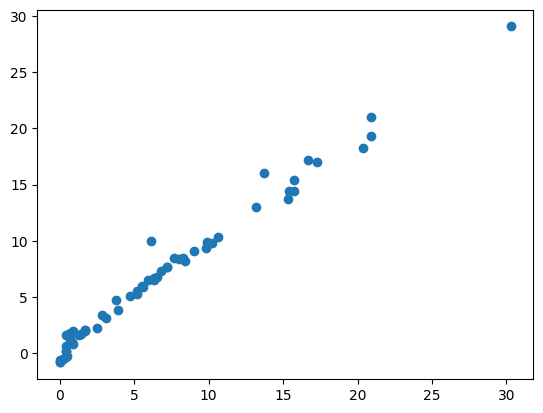

In [73]:
y_pred=lassocv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean Absolute Error:', mae)
print('R2 score:', score)
plt.scatter(y_test,y_pred)
plt.show()

#### 2. Cross validation with RidgeCV

In [76]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)

RidgeCV(cv=5)

Mean Absolute Error: 0.5642305340105693
R2 score: 0.9842993364555513


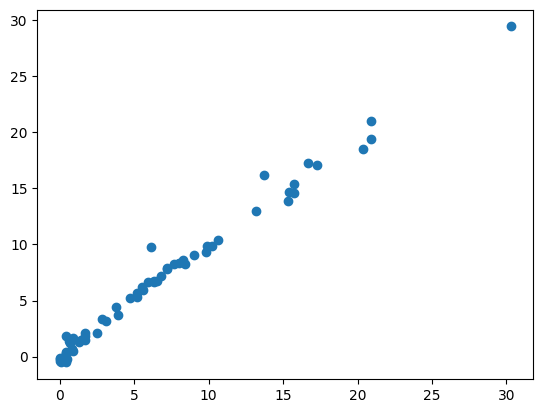

In [77]:
y_pred=ridgecv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean Absolute Error:', mae)
print('R2 score:', score)
plt.scatter(y_test,y_pred)
plt.show()

#### 3. Cross validation with ElasticNetCV¶

In [87]:
from sklearn.linear_model import ElasticNetCV
elasticv=ElasticNetCV(cv=5, selection='random')
elasticv.fit(X_train_scaled,y_train)

ElasticNetCV(cv=5, selection='random')

Mean Absolute Error: 0.6576267844903266
R2 score: 0.9814231774408216


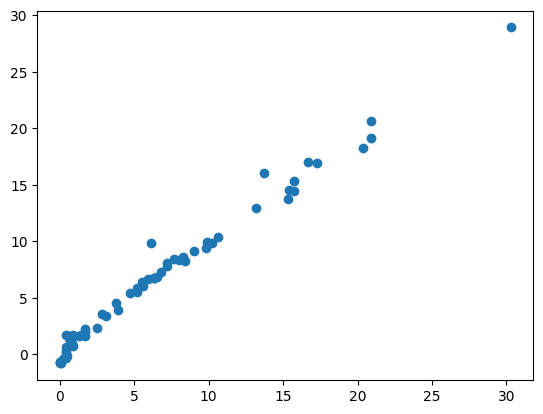

In [88]:
y_pred=elasticv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean Absolute Error:', mae)
print('R2 score:', score)
plt.scatter(y_test,y_pred)
plt.show()

In [85]:
ridgecv.get_params

<bound method BaseEstimator.get_params of RidgeCV(cv=5)>

In [86]:
elasticv.get_params

<bound method BaseEstimator.get_params of ElasticNetCV(cv=5)>